In [6]:
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
%matplotlib notebook

## Legendre Transforms

### Physical Motivation

### Graphical Interpretation

In [10]:
def x_t(t,a):
    return 1/2*a*t**2
def s_t(t,a):
    return a*t
def g_s(s,a):
    return s*s/a-x_t(s/a,a)
def g_t(t,t1,a):
    return v_t(t1,a)*(t-t1)+x_t(t1,a)

<IPython.core.display.Javascript object>


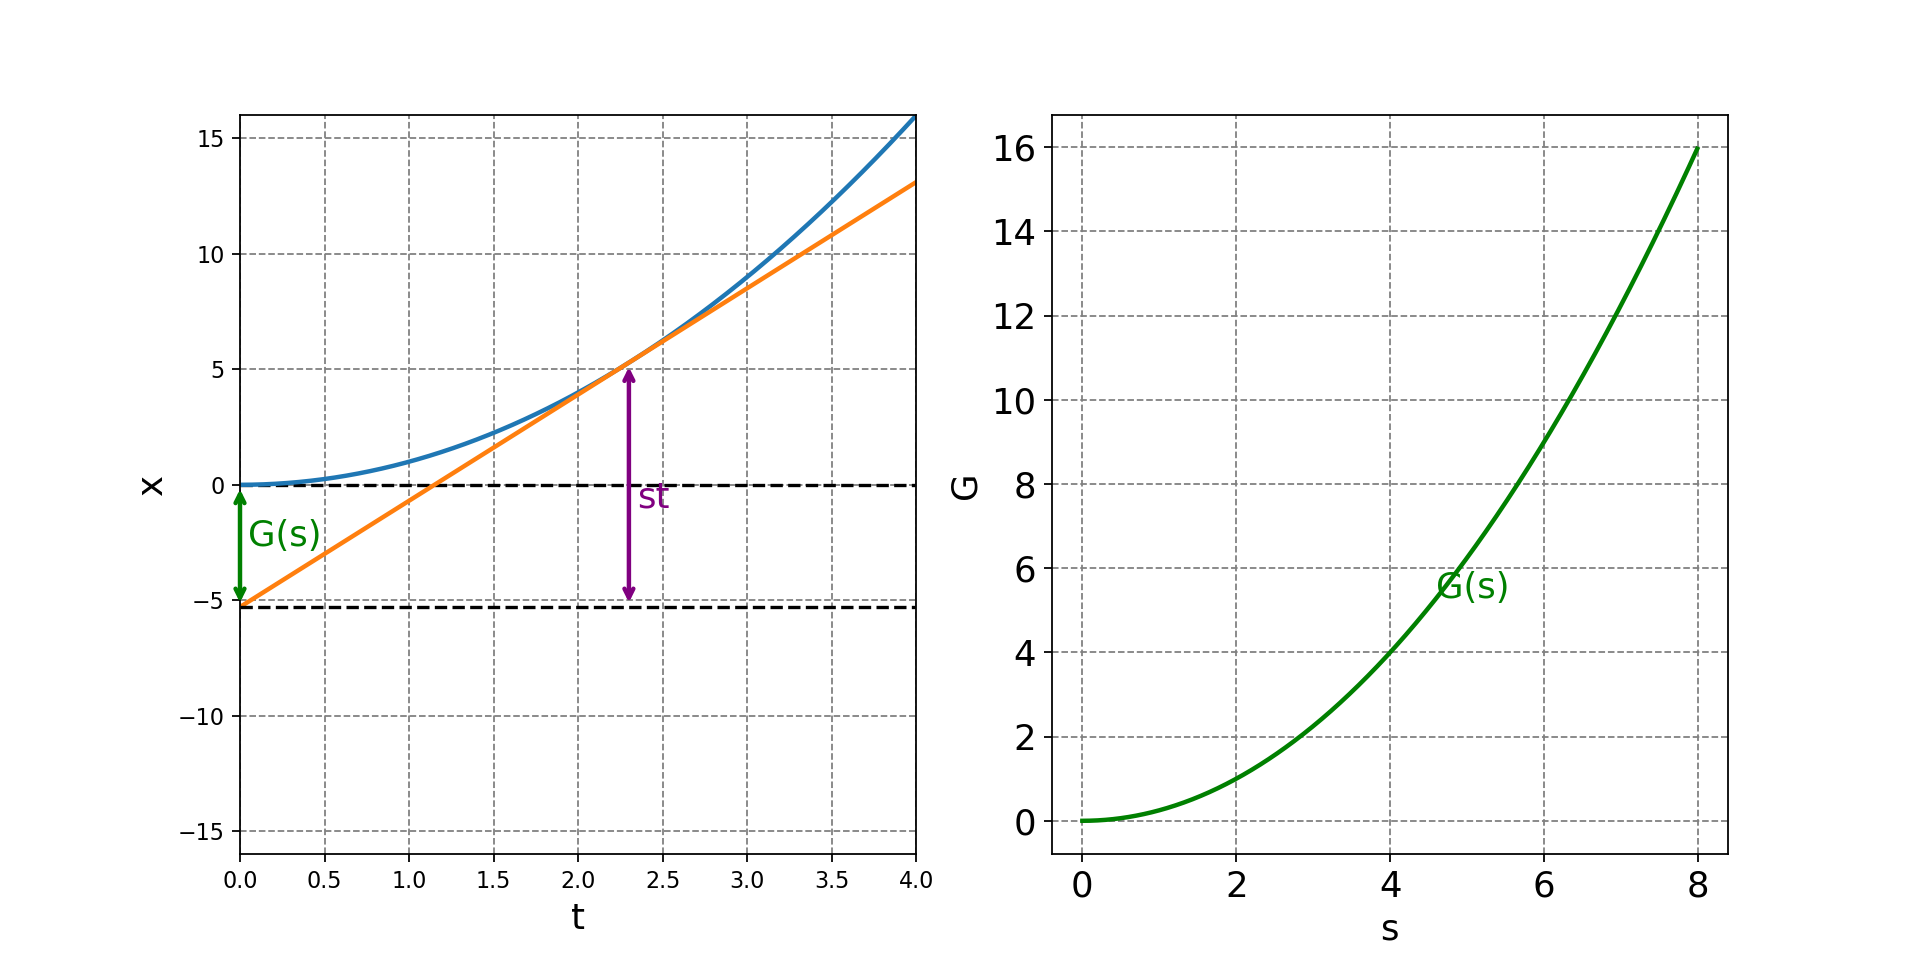

interactive(children=(FloatSlider(value=1.5, description='t0', max=4.0), Output()), _dom_classes=('widget-inte…

In [12]:
t0=1.5
a = 2
t = np.arange(0,4,0.01)
s = np.arange(0,s_t(4,a),0.01)
fig = plt.figure(figsize=(12,6), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax2.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax1.set_xlabel("t",size=16)
ax1.set_ylabel("x",size=16)
plt.tick_params(axis='both',labelsize=16)
ax2.set_xlabel("s",size=16)
ax2.set_ylabel("G",size=16)
plt.tick_params(axis='both',labelsize=16)
ax2.plot(s,g_s(s,a),c="g",lw=2)
ax1.plot(t,np.zeros(t.size),"--",c="k")
ax1.plot(t,x_t(t,a),lw=2)
line1, = ax1.plot(t,g_t(t,t0,a),lw=2)
line2, = ax1.plot(t,g_t(0,t0,a)*np.ones(t.size),"--",c="k")
#plt.text(0,0.5*g_t(0,t0,1),"G(s)",color="green",fontsize=16)
gsText = ax1.annotate("G(s)",xy=(0,0.5*g_t(0,t0,a)),color="green",fontsize=16)
annotation1 = ax1.annotate("", xy=(0, g_t(0,t0,a)), xytext=(0,x_t(0,a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'green'})
stText = ax1.annotate("st", xy=(t0,-0.5),color="purple",fontsize=16)
annotation2 = ax1.annotate("", xy=(t0, g_t(0,t0,a)), xytext=(t0,x_t(t0,a)),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'purple'})
annotation3 = ax2.annotate("G(s)", xy=(s_t(t0,a), g_s(s_t(t0,a),a)), color="green",fontsize=16)
ax1.set_xlim(0,4)
ax1.set_ylim(g_t(0,4,a),x_t(4,a))
def update(t0 = 1.5):
    line1.set_ydata(g_t(t,t0,a))
    annotation1.xy = (0, g_t(0,t0,a))
    annotation1.set_position((0,x_t(0,a)))
    gsText.set_position((0+0.05,0.5*g_t(0,t0,a)))
    annotation2.xy = (t0,x_t(t0,a))
    annotation2.set_position((t0, g_t(0,t0,a)))
    stText.set_position((t0+0.05,-1.))
    #annotation1.xytext=(t0, g_t(0,t0,1))
    line2.set_ydata(g_t(0,t0,a)*np.ones(t.size))
    # Gs
    annotation3.set_position((s_t(t0,a), g_s(s_t(t0,a),a)))
    fig.canvas.draw_idle()
interact(update,t0=(0.0,4.0));

### Thermodynamic Square